In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

In [3]:
cwd = os.path.abspath('')

In [4]:
os.listdir(cwd)

['.DS_Store',
 'DBs',
 'output',
 'README.md',
 'files',
 'Soccer2.ipynb',
 '.git',
 'envs']

In [5]:
# with this we obtain the CSV file names
os.listdir(cwd+'/Dbs')

['clubs', 'players', 'competitions', 'appearances', 'games']

In [6]:
#I want to generate DBs for each CSV file we have
df_games = pd.read_csv(cwd+'/Dbs/games')
df_clubs = pd.read_csv(cwd+'/Dbs/clubs')
df_competitions = pd.read_csv(cwd+'/Dbs/competitions')
df_appearances = pd.read_csv(cwd+'/Dbs/appearances')

In [7]:
df_games.loc[41586,'season']=2021

In [8]:
#i'm doing this since this recor's season is -1
df_games[41586:41587]

,game_id,competition_code,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,stadium,attendance,referee,url
41586,3719027,IT1,2021,19. Matchday,NaN,410,380,3,0,14.0,20.0,Dacia Arena,NaN,NaN,https://www.transfermarkt.co.uk/udinese-calcio...


In [9]:
#now we'll see how are formed the different dfs
print('Games \n')
print(df_games.info())

Games 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43080 entries, 0 to 43079
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   game_id             43080 non-null  int64  
 1   competition_code    43080 non-null  object 
 2   season              43080 non-null  int64  
 3   round               43080 non-null  object 
 4   date                43079 non-null  object 
 5   home_club_id        43080 non-null  int64  
 6   away_club_id        43080 non-null  int64  
 7   home_club_goals     43080 non-null  int64  
 8   away_club_goals     43080 non-null  int64  
 9   home_club_position  30520 non-null  float64
 10  away_club_position  30520 non-null  float64
 11  stadium             42984 non-null  object 
 12  attendance          35091 non-null  float64
 13  referee             42672 non-null  object 
 14  url                 43080 non-null  object 
dtypes: float64(3), int64(6), object(6)
memory usa

In [10]:
print('Clubs \n')
print(df_clubs.info())

Clubs 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   club_id                  379 non-null    int64  
 1   name                     379 non-null    object 
 2   pretty_name              379 non-null    object 
 3   domestic_competition_id  379 non-null    object 
 4   total_market_value       357 non-null    float64
 5   squad_size               379 non-null    int64  
 6   average_age              379 non-null    float64
 7   foreigners_number        379 non-null    int64  
 8   foreigners_percentage    347 non-null    float64
 9   national_team_players    379 non-null    int64  
 10  stadium_name             379 non-null    object 
 11  stadium_seats            379 non-null    int64  
 12  net_transfer_record      379 non-null    object 
 13  coach_name               379 non-null    object 
 14  url               

In [11]:
print('Competitions \n')
print(df_competitions.info())

Competitions 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   competition_id        42 non-null     object
 1   name                  42 non-null     object
 2   type                  42 non-null     object
 3   country_id            42 non-null     int64 
 4   country_name          35 non-null     object
 5   domestic_league_code  35 non-null     object
 6   confederation         42 non-null     object
 7   url                   42 non-null     object
dtypes: int64(1), object(7)
memory usage: 2.8+ KB
None


In [12]:
df_cards = df_appearances.groupby(['game_id'])['yellow_cards','red_cards'].apply(sum)
df_cards

/var/folders/0s/7h4wz95n3v15_376m8249hhh0000gn/T/ipykernel_8298/3085088738.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_cards = df_appearances.groupby(['game_id'])['yellow_cards','red_cards'].apply(sum)


,yellow_cards,red_cards
game_id,,
2457642.0,4,0
2458308.0,0,0
2458309.0,1,0
2458311.0,1,0
2458313.0,1,0
...,...,...
3733608.0,4,0
3733609.0,3,0
3733610.0,3,0


In [13]:
#competitions has some columns that I wont use for this analysis
df_competitions.drop(['confederation','url','domestic_league_code','country_id','country_name','type'],axis=1,inplace=True)

In [14]:
df_competitions.isnull().sum().sort_values(ascending=False)

competition_id    0
name              0
dtype: int64

In [15]:
# now i Will create two columns for away win or loss Draw, Home Win, Away Win
def win(data_frame1,data_frame2):

  result=[]
  for i in range(0,len(data_frame1)):
    if data_frame1[i]==data_frame2[i]:
      result.append(0)
    elif data_frame1[i]>data_frame2[i]:
      result.append(1)
    else:
      result.append(2)
  return result
  
#European leagues are defined from mid year to mid year, with this I want to adjust this

def season_adj(data_frame):
  season_adj=[]
  for i in data_frame:
    final=''
    final = str(i) + '-' + str(i+1)
    season_adj.append(final)
  return season_adj

In [16]:
df_games['match_result'] = win(df_games['home_club_goals'],df_games['away_club_goals'])
df_games['season_adj'] = season_adj(df_games['season'])
df_games

,game_id,competition_code,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,stadium,attendance,referee,url,match_result,season_adj
0,2457642,NLSC,2014,Final,2014-08-03,1269,610,1,0,NaN,NaN,Johan Cruijff ArenA,42000.0,Danny Makkelie,https://www.transfermarkt.co.uk/spielbericht/i...,1,2014-2015
1,2639088,BESC,2013,Final,2014-07-20,58,498,2,1,NaN,NaN,Constant Vanden Stock Stadion,13733.0,Jonathan Lardot,https://www.transfermarkt.co.uk/spielbericht/i...,1,2013-2014
2,2481145,SUC,2014,final 1st leg,2014-08-19,418,13,1,1,NaN,NaN,Santiago Bernabéu,75897.0,Estrada Fernández,https://www.transfermarkt.co.uk/spielbericht/i...,0,2014-2015
3,2484338,POSU,2014,Final,2014-08-10,294,2425,3,2,NaN,NaN,Estádio Municipal de Aveiro,30000.0,Duarte Gomes,https://www.transfermarkt.co.uk/spielbericht/i...,1,2014-2015
4,2502472,FRCH,2014,Final,2014-08-02,583,855,2,0,NaN,NaN,Workers Stadium,39752.0,Clément Turpin,https://www.transfermarkt.co.uk/spielbericht/i...,1,2014-2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43075,3643304,CLQ,2021,Qualifying Round 1st leg,2021-08-18,452,279,3,2,NaN,NaN,Stadion Wankdorf,15652.0,Willie Collum,https://www.transfermarkt.co.uk/spielbericht/i...,1,2021-2022
43076,3643354,CLQ,2021,Qualifying Round 2nd leg,2021-08-25,419,2481,0,0,NaN,NaN,Maksimir,8015.0,Daniele Orsato,https://www.transfermarkt.co.uk/spielbericht/i...,0,2021-2022
43077,3620414,CLQ,2021,3rd round 2nd leg,2021-08-10,660,1184,2,1,NaN,NaN,NSK Olimpiyskyi,20594.0,Istvan Kovacs,https://www.transfermarkt.co.uk/spielbericht/i...,1,2021-2022
43078,3615132,CLQ,2020,Second Round 2nd leg,2021-07-27,829,419,0,1,NaN,NaN,GSP Stadium,10500.0,Glenn Nyberg,https://www.transfermarkt.co.uk/spielbericht/i...,2,2020-2021


In [17]:
df_games[41585:41588]

,game_id,competition_code,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,stadium,attendance,referee,url,match_result,season_adj
41585,3614721,IT1,2021,19. Matchday,2021-12-21,252,800,0,0,18.0,4.0,Luigi Ferraris,NaN,Paolo Valeri,https://www.transfermarkt.co.uk/genoa-cfc_atal...,0,2021-2022
41586,3719027,IT1,2021,19. Matchday,NaN,410,380,3,0,14.0,20.0,Dacia Arena,NaN,NaN,https://www.transfermarkt.co.uk/udinese-calcio...,1,2021-2022
41587,3614724,IT1,2021,19. Matchday,2021-12-21,506,1390,2,0,5.0,19.0,Allianz Stadium,11197.0,Federico Dionisi,https://www.transfermarkt.co.uk/juventus-fc_ca...,1,2021-2022


In [18]:
#now I want to merge games and competitions since I want to exclude all but the big 5 leagues, FR,DE,UK,ES
df_games_final = df_games.merge(df_competitions,left_on='competition_code',right_on='competition_id',how='inner')
df_games_final.head()

,game_id,competition_code,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,stadium,attendance,referee,url,match_result,season_adj,competition_id,name
0,2457642,NLSC,2014,Final,2014-08-03,1269,610,1,0,NaN,NaN,Johan Cruijff ArenA,42000.0,Danny Makkelie,https://www.transfermarkt.co.uk/spielbericht/i...,1,2014-2015,NLSC,johan-cruijff-schaal
1,2594063,NLSC,2015,Final,2015-08-02,202,383,0,3,NaN,NaN,Johan Cruijff ArenA,24000.0,Bas Nijhuis,https://www.transfermarkt.co.uk/spielbericht/i...,2,2015-2016,NLSC,johan-cruijff-schaal
2,2697911,NLSC,2015,Final,2016-07-31,234,383,0,1,NaN,NaN,Johan Cruijff ArenA,30000.0,Serdar Gözübüyük,https://www.transfermarkt.co.uk/spielbericht/i...,2,2015-2016,NLSC,johan-cruijff-schaal
3,2864947,NLSC,2017,Final,2017-08-05,234,499,5,3,NaN,NaN,"Stadion Feyenoord ""De Kuip""",47500.0,Danny Makkelie,https://www.transfermarkt.co.uk/spielbericht/i...,1,2017-2018,NLSC,johan-cruijff-schaal
4,3055009,NLSC,2018,Final,2018-08-04,383,234,6,7,NaN,NaN,Philips Stadion,35000.0,Serdar Gözübüyük,https://www.transfermarkt.co.uk/spielbericht/i...,2,2018-2019,NLSC,johan-cruijff-schaal


In [19]:
df_games_final.rename({'name':'competition_name'},axis=1,inplace=True)

In [20]:
#now I will drop some columns that are either duplicates or won't be used
df_games_final.drop(['competition_code','season','url','competition_id'],axis=1,inplace=True)

In [21]:
df_games_final['competition_name'].unique()

array(['johan-cruijff-schaal', 'belgian-supercup', 'supercopa',
       'supertaca-candido-de-oliveira', 'trophee-des-champions',
       'eredivisie', 'liga-portugal-bwin', 'allianz-cup', 'bundesliga',
       'premier-league', 'laliga', 'copa-del-rey', 'community-shield',
       'efl-cup', 'toto-knvb-beker', 'ligue-1', 'dfl-supercup',
       'jupiler-pro-league', 'dfb-pokal', 'premier-liga',
       'ukrainian-super-cup', 'russian-cup', 'serie-a', 'ukrainian-cup',
       'sfa-cup', 'scottish-premiership', 'russian-super-cup',
       'italy-cup', 'kypello-elladas', 'uefa-super-cup',
       'uefa-champions-league', 'fifa-klub-wm', 'sydbank-pokalen',
       'superligaen', 'supercoppa-italiana', 'super-lig',
       'uefa-champions-league-qualifikation', 'super-league-1',
       'europa-league', 'europa-league-qualifikation',
       'uefa-europa-conference-league-qualifikation'], dtype=object)

In [22]:
mantaining = ['bundesliga','laliga','serie-a','ligue-1','premier-league']

In [23]:
filter = df_games_final['competition_name'].isin(mantaining)

In [24]:
df_games_final = df_games_final[filter].copy()
df_games_final

,game_id,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,stadium,attendance,referee,match_result,season_adj,competition_name
4957,2460640,2. Matchday,2014-08-30,86,533,1,1,9.0,3.0,Wohninvest-Weserstadion,38900.0,Robert Hartmann,0,2014-2015,bundesliga
4958,2460927,34. Matchday,2015-05-23,42,60,2,1,13.0,17.0,HDI-Arena,49000.0,Wolfgang Stark,1,2014-2015,bundesliga
4959,2460924,34. Matchday,2015-05-23,16,86,3,2,7.0,10.0,SIGNAL IDUNA PARK,80667.0,Manuel Gräfe,1,2014-2015,bundesliga
4960,2460925,34. Matchday,2015-05-23,18,167,1,3,3.0,5.0,Stadion im Borussia-Park,54010.0,Michael Weiner,2,2014-2015,bundesliga
4961,2460923,34. Matchday,2015-05-23,27,39,2,0,1.0,11.0,Allianz Arena,75000.0,Thorsten Kinhöfer,1,2014-2015,bundesliga
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25553,3614557,4. Matchday,2021-09-18,380,800,0,1,20.0,7.0,Arechi,11949.0,Paolo Valeri,2,2021-2022,serie-a
25554,3614540,2. Matchday,2021-08-27,410,607,3,0,6.0,19.0,Dacia Arena,8274.0,Livio Marinelli,1,2021-2022,serie-a
25555,3614536,2. Matchday,2021-08-28,398,3522,6,1,1.0,15.0,Olimpico di Roma,22000.0,Federico Dionisi,1,2021-2022,serie-a
25556,3614558,4. Matchday,2021-09-17,6574,416,0,1,12.0,10.0,Mapei Stadium - Città del Tricolore,4090.0,Marco Piccinini,2,2021-2022,serie-a


In [25]:
df_games_final = df_games_final.merge(df_cards,on='game_id',how='inner')

In [26]:
# now we'll complete the Data set with club information
df_clubs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   club_id                  379 non-null    int64  
 1   name                     379 non-null    object 
 2   pretty_name              379 non-null    object 
 3   domestic_competition_id  379 non-null    object 
 4   total_market_value       357 non-null    float64
 5   squad_size               379 non-null    int64  
 6   average_age              379 non-null    float64
 7   foreigners_number        379 non-null    int64  
 8   foreigners_percentage    347 non-null    float64
 9   national_team_players    379 non-null    int64  
 10  stadium_name             379 non-null    object 
 11  stadium_seats            379 non-null    int64  
 12  net_transfer_record      379 non-null    object 
 13  coach_name               379 non-null    object 
 14  url                      3

In [27]:
df_away=df_clubs[['club_id','pretty_name','total_market_value','squad_size',
                  'average_age','foreigners_number']].copy()
df_home=df_clubs[['club_id','pretty_name','total_market_value','squad_size',
                  'average_age','foreigners_number','stadium_name','stadium_seats']].copy()

In [28]:
df_games_final= df_games_final.merge(df_home,left_on='home_club_id',right_on='club_id',how='inner',
suffixes=(None,"_home"))
df_games_final.head()

,game_id,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,stadium,...,yellow_cards,red_cards,club_id,pretty_name,total_market_value,squad_size,average_age,foreigners_number,stadium_name,stadium_seats
0,2460640,2. Matchday,2014-08-30,86,533,1,1,9.0,3.0,Wohninvest-Weserstadion,...,3,0,86,Sv Werder Bremen,73.24,33,24.4,13,Wohninvest-Weserstadion,42100
1,2460920,33. Matchday,2015-05-16,86,18,0,2,8.0,3.0,Wohninvest-Weserstadion,...,1,0,86,Sv Werder Bremen,73.24,33,24.4,13,Wohninvest-Weserstadion,42100
2,2460903,31. Matchday,2015-05-02,86,24,1,0,7.0,12.0,Wohninvest-Weserstadion,...,4,0,86,Sv Werder Bremen,73.24,33,24.4,13,Wohninvest-Weserstadion,42100
3,2460884,29. Matchday,2015-04-19,86,41,1,0,7.0,18.0,Wohninvest-Weserstadion,...,4,1,86,Sv Werder Bremen,73.24,33,24.4,13,Wohninvest-Weserstadion,42100
4,2460866,27. Matchday,2015-04-04,86,39,0,0,9.0,12.0,Wohninvest-Weserstadion,...,6,0,86,Sv Werder Bremen,73.24,33,24.4,13,Wohninvest-Weserstadion,42100


In [29]:
df_games_final= df_games_final.merge(df_away,left_on='away_club_id',right_on='club_id',how='inner',suffixes=("_home","_away"))
df_games_final

,game_id,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,stadium,...,average_age_home,foreigners_number_home,stadium_name,stadium_seats,club_id_away,pretty_name_away,total_market_value_away,squad_size_away,average_age_away,foreigners_number_away
0,2460640,2. Matchday,2014-08-30,86,533,1,1,9.0,3.0,Wohninvest-Weserstadion,...,24.4,13,Wohninvest-Weserstadion,42100,533,Tsg 1899 Hoffenheim,183.38,33,25.2,20
1,2581848,21. Matchday,2016-02-13,86,533,1,1,16.0,17.0,Wohninvest-Weserstadion,...,24.4,13,Wohninvest-Weserstadion,42100,533,Tsg 1899 Hoffenheim,183.38,33,25.2,20
2,2704700,33. Matchday,2017-05-13,86,533,3,5,8.0,4.0,Wohninvest-Weserstadion,...,24.4,13,Wohninvest-Weserstadion,42100,533,Tsg 1899 Hoffenheim,183.38,33,25.2,20
3,2871487,18. Matchday,2018-01-13,86,533,1,1,16.0,8.0,Wohninvest-Weserstadion,...,24.4,13,Wohninvest-Weserstadion,42100,533,Tsg 1899 Hoffenheim,183.38,33,25.2,20
4,3058554,16. Matchday,2018-12-19,86,533,1,1,9.0,7.0,Wohninvest-Weserstadion,...,24.4,13,Wohninvest-Weserstadion,42100,533,Tsg 1899 Hoffenheim,183.38,33,25.2,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13708,3615119,12. Matchday,2021-11-07,398,380,3,0,5.0,20.0,Olimpico di Roma,...,27.2,24,Olimpico di Roma,73261,380,Us Salernitana 1919,28.98,30,26.7,16
13709,3614731,21. Matchday,2022-01-09,276,380,1,2,12.0,20.0,Marcantonio Bentegodi,...,26.1,14,Marcantonio Bentegodi,39211,380,Us Salernitana 1919,28.98,30,26.7,16
13710,3614505,1. Matchday,2021-08-22,1025,380,3,2,6.0,20.0,Stadio Renato Dall’Ara,...,25.8,18,Stadio Renato Dall’Ara,36462,380,Us Salernitana 1919,28.98,30,26.7,16
13711,3614600,8. Matchday,2021-10-16,3522,380,2,1,16.0,20.0,Alberto Picco,...,23.2,22,Alberto Picco,10336,380,Us Salernitana 1919,28.98,30,26.7,16


In [30]:
#now we have what we need to run some analysis, first we'll drop Columns that are duplicates
df_games_final.columns

Index(['game_id', 'round', 'date', 'home_club_id', 'away_club_id',
       'home_club_goals', 'away_club_goals', 'home_club_position',
       'away_club_position', 'stadium', 'attendance', 'referee',
       'match_result', 'season_adj', 'competition_name', 'yellow_cards',
       'red_cards', 'club_id_home', 'pretty_name_home',
       'total_market_value_home', 'squad_size_home', 'average_age_home',
       'foreigners_number_home', 'stadium_name', 'stadium_seats',
       'club_id_away', 'pretty_name_away', 'total_market_value_away',
       'squad_size_away', 'average_age_away', 'foreigners_number_away'],
      dtype='object')

In [31]:
df_games_final.drop(['home_club_id', 'away_club_id',
                             'home_club_position','away_club_position', 'stadium'],
                            axis=1,inplace=True)

In [32]:
df_games_final.isnull().sum().sort_values(ascending=False)

attendance                 2151
total_market_value_home      19
total_market_value_away      19
referee                       8
game_id                       0
average_age_away              0
squad_size_away               0
pretty_name_away              0
club_id_away                  0
stadium_seats                 0
stadium_name                  0
foreigners_number_home        0
average_age_home              0
squad_size_home               0
pretty_name_home              0
round                         0
club_id_home                  0
red_cards                     0
yellow_cards                  0
competition_name              0
season_adj                    0
match_result                  0
away_club_goals               0
home_club_goals               0
date                          0
foreigners_number_away        0
dtype: int64

In [33]:
# attendance nulls will be left as they are since those are COVID matches where no one could go to a match
df_games_final[df_games_final['season_adj']=='2020-2021'].head()

,game_id,round,date,home_club_goals,away_club_goals,attendance,referee,match_result,season_adj,competition_name,...,average_age_home,foreigners_number_home,stadium_name,stadium_seats,club_id_away,pretty_name_away,total_market_value_away,squad_size_away,average_age_away,foreigners_number_away
6,3412962,5. Matchday,2020-10-25,1,1,NaN,Daniel Schlager,0,2020-2021,bundesliga,...,24.4,13,Wohninvest-Weserstadion,42100,533,Tsg 1899 Hoffenheim,183.38,33,25.2,20
17,3413127,21. Matchday,2021-02-13,2,2,NaN,Bastian Dankert,0,2020-2021,bundesliga,...,24.8,18,SIGNAL IDUNA PARK,81365,533,Tsg 1899 Hoffenheim,183.38,33,25.2,20
25,3413082,13. Matchday,2020-12-19,1,2,NaN,Frank Willenborg,2,2020-2021,bundesliga,...,25.4,14,Stadion im Borussia-Park,54022,533,Tsg 1899 Hoffenheim,183.38,33,25.2,20
32,3413162,19. Matchday,2021-01-30,4,1,NaN,Benjamin Cortus,1,2020-2021,bundesliga,...,25.1,14,Allianz Arena,75024,533,Tsg 1899 Hoffenheim,183.38,33,25.2,20
41,3412889,1. Matchday,2020-09-19,2,3,NaN,Daniel Siebert,2,2020-2021,bundesliga,...,25.3,9,RheinEnergieStadion,50000,533,Tsg 1899 Hoffenheim,183.38,33,25.2,20


In [34]:
#now i want to run some comparisons between the different leagues, for this, we'll plot some metrics like, attendance, % of attendance
#scored goals, avg market value per team.
df_games_final['attendance_rate'] = df_games_final['attendance']/df_games_final['stadium_seats']
df_games_final['match_goals'] = df_games_final['home_club_goals']+df_games_final['away_club_goals']

In [35]:
#I need to create additional data sets for some comparisons
df_season = df_games_final.groupby(['competition_name','season_adj'])['home_club_goals','away_club_goals','match_goals','attendance'].apply(sum)
df_season.reset_index(inplace=True)
df_season.head(2)

/var/folders/0s/7h4wz95n3v15_376m8249hhh0000gn/T/ipykernel_8298/934210629.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_season = df_games_final.groupby(['competition_name','season_adj'])['home_club_goals','away_club_goals','match_goals','attendance'].apply(sum)


,competition_name,season_adj,home_club_goals,away_club_goals,match_goals,attendance
0,bundesliga,2014-2015,486.0,357.0,843.0,13336616.0
1,bundesliga,2015-2016,479.0,387.0,866.0,13236879.0


In [36]:
df_season['attendance'] = df_season['attendance']/1000000

In [37]:
pd.options.display.float_format='{:,.2f}'.format

In [38]:
df_season.head(1)

,competition_name,season_adj,home_club_goals,away_club_goals,match_goals,attendance
0,bundesliga,2014-2015,486.00,357.00,843.00,13.34


In [39]:
df_transfer_val = df_games_final.groupby(['competition_name','season_adj','pretty_name_home']).agg({'total_market_value_home':'mean'})
df_transfer_val.reset_index(inplace=True)

In [40]:
#now I want to run an analysis for the different leagues, clubs number of wins, draws, loses mkt value etc ... 

In [41]:
df_games_final.columns

Index(['game_id', 'round', 'date', 'home_club_goals', 'away_club_goals',
       'attendance', 'referee', 'match_result', 'season_adj',
       'competition_name', 'yellow_cards', 'red_cards', 'club_id_home',
       'pretty_name_home', 'total_market_value_home', 'squad_size_home',
       'average_age_home', 'foreigners_number_home', 'stadium_name',
       'stadium_seats', 'club_id_away', 'pretty_name_away',
       'total_market_value_away', 'squad_size_away', 'average_age_away',
       'foreigners_number_away', 'attendance_rate', 'match_goals'],
      dtype='object')

In [42]:
df_season_cards = df_games_final.groupby(['competition_name','season_adj']).agg({'yellow_cards':'sum',
'red_cards':'sum','game_id':'count'})

In [43]:
df_season_cards.reset_index(inplace=True)
df_season_cards

,competition_name,season_adj,yellow_cards,red_cards,game_id
0,bundesliga,2014-2015,1162,25,306
1,bundesliga,2015-2016,1214,15,306
2,bundesliga,2016-2017,1199,28,306
3,bundesliga,2017-2018,1053,20,306
4,bundesliga,2018-2019,1050,21,306
5,bundesliga,2019-2020,1222,20,306
6,bundesliga,2020-2021,1105,15,306
7,bundesliga,2021-2022,635,8,180
8,laliga,2014-2015,2128,45,380
9,laliga,2015-2016,2144,32,380


In [44]:
df_home = df_games_final.groupby(['competition_name','season_adj','club_id_home',
                        'pretty_name_home']).agg({'home_club_goals':'sum',
                                                  'away_club_goals':'sum',
                                                  'total_market_value_home':'mean',
                                                  'match_result':[lambda x: (x==0).sum(),
                                                                  lambda x: (x==1).sum(),
                                                                  lambda x: (x==2).sum()],
                                                 'attendance_rate':'median'})

df_home.reset_index(inplace=True)
df_home.rename({'<lambda_0>':'Draws','<lambda_1>':'Wins','<lambda_2>':'Loses'},axis=1,level=1, inplace=True)
df_home.columns = df_home.columns.map('_'.join)

df_away = df_games_final.groupby(['competition_name','season_adj','club_id_away',
                        'pretty_name_away']).agg({'home_club_goals':'sum',
                                                  'away_club_goals':'sum',
                                                  'match_result':[lambda x: (x==0).sum(),
                                                                  lambda x: (x==1).sum(),
                                                                  lambda x: (x==2).sum()]})
df_away.reset_index(inplace=True)
df_away.rename({'<lambda_0>':'Draws','<lambda_1>':'Loses','<lambda_2>':'Wins'},axis=1,level=1, inplace=True)
df_away.columns = df_away.columns.map('_'.join)


In [45]:
print(df_home.columns)
print('\n')
print(df_away.columns)

Index(['competition_name_', 'season_adj_', 'club_id_home_',
       'pretty_name_home_', 'home_club_goals_sum', 'away_club_goals_sum',
       'total_market_value_home_mean', 'match_result_Draws',
       'match_result_Wins', 'match_result_Loses', 'attendance_rate_median'],
      dtype='object')


Index(['competition_name_', 'season_adj_', 'club_id_away_',
       'pretty_name_away_', 'home_club_goals_sum', 'away_club_goals_sum',
       'match_result_Draws', 'match_result_Loses', 'match_result_Wins'],
      dtype='object')


In [46]:
df_home.columns=['competition_name', 'season_adj', 'club_id_home',
       'pretty_name_home', 'home_scored_goals', 'home_received_goals',
       'total_market_value', 'Home_Draws',
       'Home_Wins', 'Home_Loses', 'attendance_rate_median']
df_home

,competition_name,season_adj,club_id_home,pretty_name_home,home_scored_goals,home_received_goals,total_market_value,Home_Draws,Home_Wins,Home_Loses,attendance_rate_median
0,bundesliga,2014-2015,3,1 Fc Koln,18,17,64.13,9,4,4,0.99
1,bundesliga,2014-2015,15,Bayer 04 Leverkusen,39,15,367.16,6,10,1,1.00
2,bundesliga,2014-2015,16,Borussia Dortmund,26,15,519.21,3,9,5,0.99
3,bundesliga,2014-2015,18,Borussia Monchengladbach,32,14,237.87,3,12,2,0.97
4,bundesliga,2014-2015,24,Eintracht Frankfurt,36,26,180.09,5,9,3,0.97
...,...,...,...,...,...,...,...,...,...,...,...
782,serie-a,2021-2022,1038,Sampdoria Genua,16,25,96.03,3,2,7,0.15
783,serie-a,2021-2022,1390,Cagliari Calcio,14,20,117.77,4,2,5,0.48
784,serie-a,2021-2022,3522,Spezia Calcio,12,14,63.00,3,3,5,0.55
785,serie-a,2021-2022,6195,Ssc Neapel,18,7,456.62,1,7,3,0.43


In [47]:
df_away.columns=['competition_name', 'season_adj', 'club_id_away',
       'pretty_name_away', 'away_received_goals', 'away_scored_goals',
       'Away_Draws', 'Away_Loses', 'Away_Wins']
df_away

,competition_name,season_adj,club_id_away,pretty_name_away,away_received_goals,away_scored_goals,Away_Draws,Away_Loses,Away_Wins
0,bundesliga,2014-2015,3,1 Fc Koln,23,16,4,8,5
1,bundesliga,2014-2015,15,Bayer 04 Leverkusen,22,23,4,6,7
2,bundesliga,2014-2015,16,Borussia Dortmund,27,21,4,9,4
3,bundesliga,2014-2015,18,Borussia Monchengladbach,12,21,6,4,7
4,bundesliga,2014-2015,24,Eintracht Frankfurt,36,20,5,10,2
...,...,...,...,...,...,...,...,...,...
779,serie-a,2021-2022,1038,Sampdoria Genua,16,13,2,6,3
780,serie-a,2021-2022,1390,Cagliari Calcio,23,7,3,7,1
781,serie-a,2021-2022,3522,Spezia Calcio,28,12,1,7,4
782,serie-a,2021-2022,6195,Ssc Neapel,8,21,3,1,7


In [48]:
df_clubs_2graph = df_home.merge(df_away,left_on=['competition_name','season_adj','club_id_home',
                                                  'pretty_name_home'],
                                right_on=['competition_name','season_adj','club_id_away',
                                          'pretty_name_away'],how='inner',suffixes=("_home","_away"))
df_clubs_2graph.head()

,competition_name,season_adj,club_id_home,pretty_name_home,home_scored_goals,home_received_goals,total_market_value,Home_Draws,Home_Wins,Home_Loses,attendance_rate_median,club_id_away,pretty_name_away,away_received_goals,away_scored_goals,Away_Draws,Away_Loses,Away_Wins
0,bundesliga,2014-2015,3,1 Fc Koln,18,17,64.13,9,4,4,0.99,3,1 Fc Koln,23,16,4,8,5
1,bundesliga,2014-2015,15,Bayer 04 Leverkusen,39,15,367.16,6,10,1,1.00,15,Bayer 04 Leverkusen,22,23,4,6,7
2,bundesliga,2014-2015,16,Borussia Dortmund,26,15,519.21,3,9,5,0.99,16,Borussia Dortmund,27,21,4,9,4
3,bundesliga,2014-2015,18,Borussia Monchengladbach,32,14,237.87,3,12,2,0.97,18,Borussia Monchengladbach,12,21,6,4,7
4,bundesliga,2014-2015,24,Eintracht Frankfurt,36,26,180.09,5,9,3,0.97,24,Eintracht Frankfurt,36,20,5,10,2


In [49]:
df_clubs_2graph.columns

Index(['competition_name', 'season_adj', 'club_id_home', 'pretty_name_home',
       'home_scored_goals', 'home_received_goals', 'total_market_value',
       'Home_Draws', 'Home_Wins', 'Home_Loses', 'attendance_rate_median',
       'club_id_away', 'pretty_name_away', 'away_received_goals',
       'away_scored_goals', 'Away_Draws', 'Away_Loses', 'Away_Wins'],
      dtype='object')

In [50]:
df_clubs_2graph.drop(['club_id_away', 'pretty_name_away'],axis=1,inplace=True)

In [51]:
df_clubs_2graph.columns

Index(['competition_name', 'season_adj', 'club_id_home', 'pretty_name_home',
       'home_scored_goals', 'home_received_goals', 'total_market_value',
       'Home_Draws', 'Home_Wins', 'Home_Loses', 'attendance_rate_median',
       'away_received_goals', 'away_scored_goals', 'Away_Draws', 'Away_Loses',
       'Away_Wins'],
      dtype='object')

In [52]:
#now we'll calculate total goals, total received goals, total wins, loses and draws
df_clubs_2graph['tlt_scored_goals'] = df_clubs_2graph['home_scored_goals']+df_clubs_2graph['away_scored_goals']
df_clubs_2graph['tlt_received_goals'] = df_clubs_2graph['home_received_goals']+df_clubs_2graph['away_received_goals']
df_clubs_2graph['tlt_draws'] = df_clubs_2graph['Home_Draws']+df_clubs_2graph['Away_Draws']
df_clubs_2graph['tlt_wins'] = df_clubs_2graph['Home_Wins']+df_clubs_2graph['Away_Wins']
df_clubs_2graph['tlt_loses'] = df_clubs_2graph['Home_Loses']+df_clubs_2graph['Away_Loses']

In [53]:
df_leagues = df_clubs_2graph.groupby(['competition_name','season_adj'])['tlt_scored_goals','tlt_draws',
                                                                        'tlt_wins', 'tlt_loses',
                                                                        'total_market_value'].apply(sum)

df_leagues.reset_index(inplace=True)
df_leagues

/var/folders/0s/7h4wz95n3v15_376m8249hhh0000gn/T/ipykernel_8298/3102260255.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_leagues = df_clubs_2graph.groupby(['competition_name','season_adj'])['tlt_scored_goals','tlt_draws',


,competition_name,season_adj,tlt_scored_goals,tlt_draws,tlt_wins,tlt_loses,total_market_value
0,bundesliga,2014-2015,843.00,164.00,224.00,224.00,"3,328.59"
1,bundesliga,2015-2016,866.00,142.00,235.00,235.00,"3,201.66"
2,bundesliga,2016-2017,877.00,148.00,232.00,232.00,"3,579.31"
3,bundesliga,2017-2018,855.00,166.00,223.00,223.00,"3,744.91"
4,bundesliga,2018-2019,973.00,146.00,233.00,233.00,"3,692.23"
5,bundesliga,2019-2020,982.00,136.00,238.00,238.00,"3,632.75"
6,bundesliga,2020-2021,928.00,162.00,225.00,225.00,"3,812.35"
7,bundesliga,2021-2022,560.00,86.00,137.00,137.00,"3,733.15"
8,laliga,2014-2015,"1,009.00",182.00,289.00,289.00,"3,935.50"
9,laliga,2015-2016,"1,043.00",184.00,288.00,288.00,"4,079.57"


In [54]:
df_leagues

,competition_name,season_adj,tlt_scored_goals,tlt_draws,tlt_wins,tlt_loses,total_market_value
0,bundesliga,2014-2015,843.00,164.00,224.00,224.00,"3,328.59"
1,bundesliga,2015-2016,866.00,142.00,235.00,235.00,"3,201.66"
2,bundesliga,2016-2017,877.00,148.00,232.00,232.00,"3,579.31"
3,bundesliga,2017-2018,855.00,166.00,223.00,223.00,"3,744.91"
4,bundesliga,2018-2019,973.00,146.00,233.00,233.00,"3,692.23"
5,bundesliga,2019-2020,982.00,136.00,238.00,238.00,"3,632.75"
6,bundesliga,2020-2021,928.00,162.00,225.00,225.00,"3,812.35"
7,bundesliga,2021-2022,560.00,86.00,137.00,137.00,"3,733.15"
8,laliga,2014-2015,"1,009.00",182.00,289.00,289.00,"3,935.50"
9,laliga,2015-2016,"1,043.00",184.00,288.00,288.00,"4,079.57"


In [55]:
df_leagues = df_leagues.merge(df_season_cards,on=['competition_name','season_adj'],how='inner')

In [56]:
df_leagues.rename({'game_id':'number_of_games'},axis=1,inplace=True)

In [57]:
df_leagues.head()

,competition_name,season_adj,tlt_scored_goals,tlt_draws,tlt_wins,tlt_loses,total_market_value,yellow_cards,red_cards,number_of_games
0,bundesliga,2014-2015,843.00,164.00,224.00,224.00,"3,328.59",1162,25,306
1,bundesliga,2015-2016,866.00,142.00,235.00,235.00,"3,201.66",1214,15,306
2,bundesliga,2016-2017,877.00,148.00,232.00,232.00,"3,579.31",1199,28,306
3,bundesliga,2017-2018,855.00,166.00,223.00,223.00,"3,744.91",1053,20,306
4,bundesliga,2018-2019,973.00,146.00,233.00,233.00,"3,692.23",1050,21,306


In [58]:
df_leagues['draw_proportion'] = df_leagues['tlt_draws']/df_leagues['number_of_games']
df_leagues['number_of_cards'] = df_leagues['yellow_cards']+df_leagues['red_cards']

Below different graph comparisons between leagues, my main objective is trying to identify why the Premier League is currently the best league

In [107]:
df_games.columns

Index(['game_id', 'competition_code', 'season', 'round', 'date',
       'home_club_id', 'away_club_id', 'home_club_goals', 'away_club_goals',
       'home_club_position', 'away_club_position', 'stadium', 'attendance',
       'referee', 'url', 'match_result', 'season_adj'],
      dtype='object')

First let's See differences in Attendance

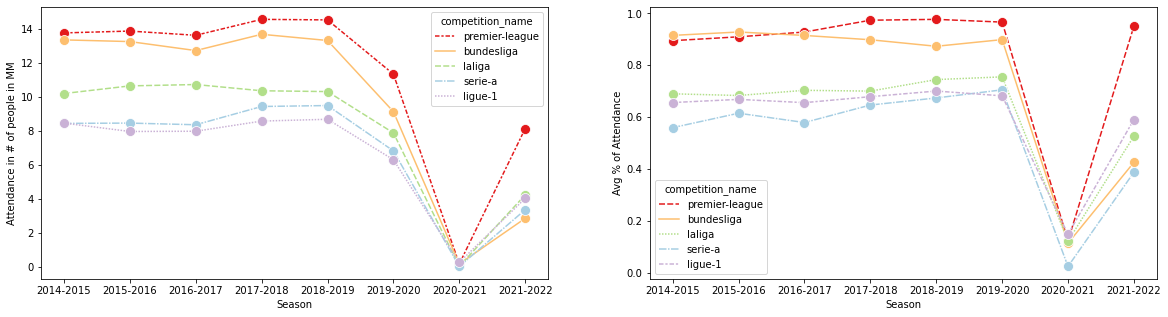

In [158]:
fig, axs = plt.subplots(1,2, figsize=(20,5))

colors = sns.color_palette('Paired')
col_list = [colors[5],colors[6],colors[2],colors[0],colors[8]]

sns.lineplot(data=df_season,x='season_adj',y='attendance',hue='competition_name',
            hue_order=['premier-league','bundesliga','laliga','serie-a','ligue-1'], 
            marker='o',markersize=10, style = 'competition_name',ci=None,ax=axs[0],
            palette=col_list)
axs[0].set_xlabel('Season')
axs[0].set_ylabel('Attendance in # of people in MM')

sns.lineplot(data=df_games_final,x='season_adj',y='attendance_rate',hue='competition_name',
            hue_order=['premier-league','bundesliga','laliga','serie-a','ligue-1'], 
            marker='o',markersize=10, style = 'competition_name',ci=None,ax=axs[1],
            palette=col_list)
axs[1].set_xlabel('Season')
axs[1].set_ylabel('Avg % of Attendance')

plt.show()

 There are a couple of observations that id'like to comment

 - As we can see, Premier League and Bundes liga have pretty good numbers for attendance, the difference againts the third best are around 4MM
 - In seasons 19-20 and 20-21 we see COVID's impact diminishing a lot the number of People that attended the matches
 - Now turnign to the attendance rate or occupation rate, We see Germans and British on the Top as well.
 - Recuperation from COVID has been faster for Premier League
 - I don't personally see bundesliga as the second best of Europe that place would be for La Liga, yet, Germans have done a pretty good job mantaining people's interest in their local league

I'm now interested on knowing what's different between the top 2 and the others: 

- Are ticket prices affordable to people on those countries and not to the others?
- Is quality better on those leagues
- Is Soccer culturally speaking better placed in UK and Germany?

with the information on hand it is not possible to answer these questions, however I'll try to check those too.

Now let's compare the number of goals among the leagues

In [110]:
df_season.columns

Index(['competition_name', 'season_adj', 'home_club_goals', 'away_club_goals',
       'match_goals', 'attendance'],
      dtype='object')

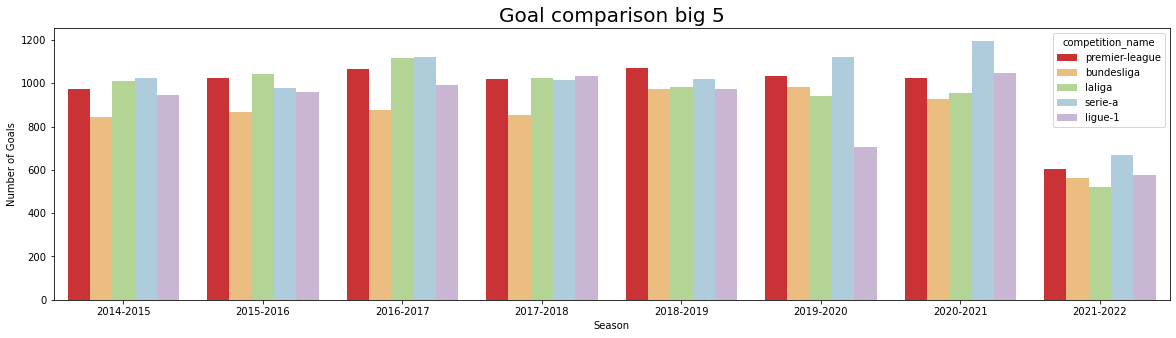

In [170]:
fig, axs = plt.subplots(figsize=(20,5))

sns.barplot(data=df_season,x='season_adj', y='match_goals', hue='competition_name',
            hue_order=['premier-league','bundesliga','laliga','serie-a','ligue-1'],palette=col_list)
axs.set_xlabel('Season')
axs.set_ylabel('Number of Goals')

plt.title("Goal comparison big 5", fontsize=20)
plt.show()


- As we can see, Premier League is not the league that scores the greatest amount of goals per season
- YoY Differnce is less pronounced than in other leagues
- Considering that my aim is to eval the premier league now we'll graph it against all the other leagues

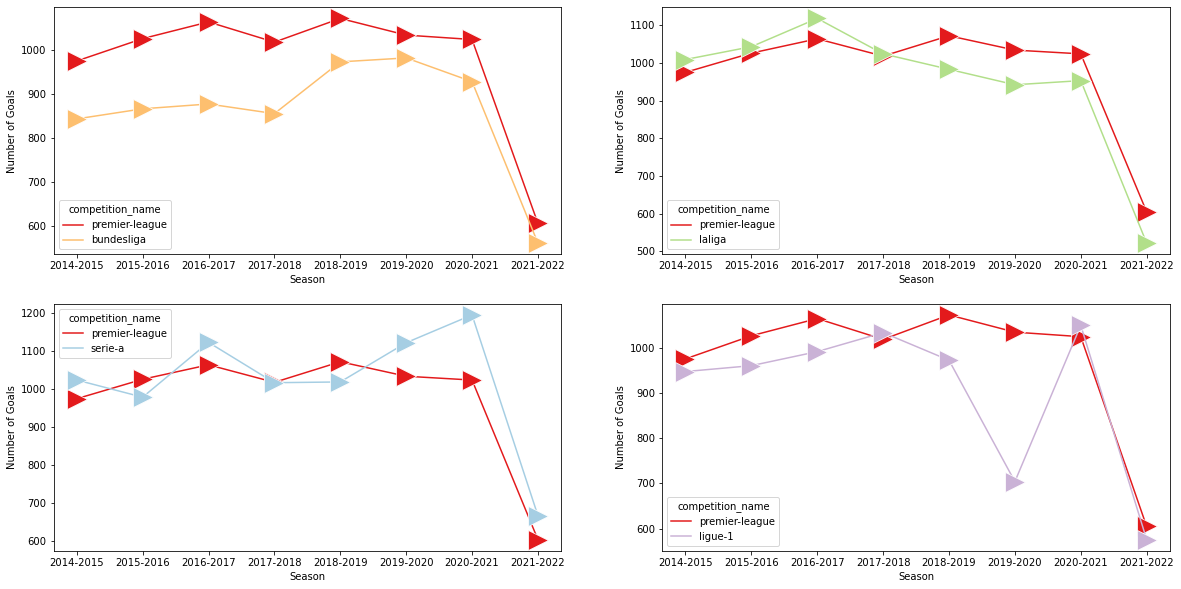

In [172]:
fig, axs = plt.subplots(2,2,figsize=(20,10))

#col_list = [colors[5],colors[6],colors[2],colors[0],colors[8]]

sns.lineplot(data=df_season[df_season['competition_name'].isin(['bundesliga','premier-league'])],
            x='season_adj', y='match_goals',hue='competition_name',hue_order=['premier-league','bundesliga'], ci=None,ax=axs[0,0],
            marker='>',markersize=20,palette=[col_list[0],col_list[1]])
axs[0,0].set_xlabel('Season')
axs[0,0].set_ylabel('Number of Goals')
sns.lineplot(data=df_season[df_season['competition_name'].isin(['laliga','premier-league'])],
            x='season_adj', y='match_goals',hue='competition_name',hue_order=['premier-league','laliga'], ci=None,ax=axs[0,1],
            marker='>',markersize=20,palette=[col_list[0],col_list[2]])
axs[0,1].set_xlabel('Season')
axs[0,1].set_ylabel('Number of Goals')

sns.lineplot(data=df_season[df_season['competition_name'].isin(['serie-a','premier-league'])],
            x='season_adj', y='match_goals',hue='competition_name',hue_order=['premier-league','serie-a'], ci=None,ax=axs[1,0],
            marker='>',markersize=20,palette=[col_list[0],col_list[3]])
axs[1,0].set_xlabel('Season')
axs[1,0].set_ylabel('Number of Goals')

sns.lineplot(data=df_season[df_season['competition_name'].isin(['ligue-1','premier-league'])],
            x='season_adj', y='match_goals',hue='competition_name',hue_order=['premier-league','ligue-1'], ci=None,ax=axs[1,1],
            marker='>',markersize=20,palette=[col_list[0],col_list[4]])
axs[1,1].set_xlabel('Season')
axs[1,1].set_ylabel('Number of Goals')
plt.show()

- Premier Legue have a very similar behaviour with peaks and drops on the same seasons
- La Liga had dominance in the first three seasons, however after 2017-2018 the number of goals decresed
- Serie A has one of the most uneven behaviours, last season 2020-2021 they scored lots of goals approacing the 1200
- Ligue 1 Also has big differencesin the last 4 seasons, their league tend to export lots of player to the bigger leagues so this could be a reason but analysis on a player level should be done first

In [ ]:
line_graph(df_transfer_val,'total_market_value_home',1,1)
axs[1,1].set_xlabel('Season')
axs[1,1].set_ylabel('Average Transfer Market Value')

line_graph(df_leagues,'total_market_value',2,1)
axs[2,1].set_xlabel('Season')
axs[2,1].set_ylabel('Transfer Market Value')

line_graph(df_leagues,'draw_proportion',2,0)
axs[2,0].set_xlabel('Season')
axs[2,0].set_ylabel('Proportion of Draw games')

line_graph(df_leagues,'number_of_cards',3,0)
axs[3,0].set_xlabel('Season')
axs[3,0].set_ylabel('Number of Cards per season')

line_graph(df_leagues,'red_cards',3,1)
axs[3,1].set_xlabel('Season')
axs[3,1].set_ylabel('Number of Red Cards')

In [62]:
#so far I have created and merged all fields i intended and onbtained some insights about the big 5 however it is easier 
# to do this graph analyisis on a different app like tableau or dash so i'm exporting this dataset to csv

In [63]:
df_season.to_csv(cwd+'/output/seasons.csv',sep=',',float_format='${:,.2f}'.format,index=False)
df_games_final.to_csv(cwd+'/output/games.csv',sep=',',float_format='${:,.2f}'.format,index=False)
df_leagues.to_csv(cwd+'/output/leagues.csv',sep=',',float_format='${:,.2f}'.format,index=False)
df_transfer_val.to_csv(cwd+'/output/transfer.csv',sep=',',float_format='${:,.2f}'.format,index=False)